In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [3]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

### Basics

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
df[(df['CPC'] > 1) & (df['Clicks'] > 10) ].head()

In [ ]:
df.shape

(23066, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df['InventoryType'].unique()

array(['Format1', 'Format6', 'Format5', 'Format7', 'Format4', 'Format3',
       'Format2'], dtype=object)

In [7]:
df['Ad Type'].unique()

array(['Inter222', 'Inter227', 'Inter228', 'Inter217', 'Inter219',
       'Inter221', 'Inter223', 'Inter225', 'Inter229', 'Inter224',
       'inter230', 'Inter226', 'Inter220', 'Inter218'], dtype=object)

In [ ]:
df['Ad Size'].unique()

array([ 75000,  84000, 216000, 180000,  72000,  33600,  65520])

In [ ]:
df['Platform'].unique()

array(['Video', 'App', 'Web'], dtype=object)

In [ ]:
df['Device Type'].unique()

array(['Desktop', 'Mobile'], dtype=object)

In [ ]:
df['Format'].unique()

array(['Display', 'Video'], dtype=object)

In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
df.duplicated().sum()

0

### EDA

#### Univariate Analysis

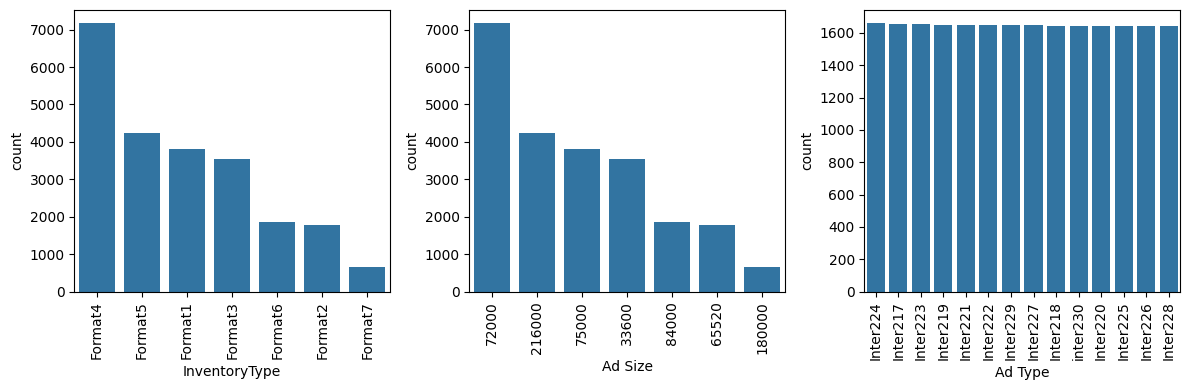

In [ ]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.countplot(x='InventoryType', data=df, order=df['InventoryType'].value_counts().index);
plt.xticks(rotation=90);
plt.subplot(132)
sns.countplot(x='Ad Size', data=df, order=df['Ad Size'].value_counts().index);
plt.xticks(rotation=90);
plt.subplot(133)
sns.countplot(x='Ad Type',data=df, order=df['Ad Type'].value_counts().index);
plt.xticks(rotation=90);
plt.tight_layout()

In [ ]:
df['Ad_LW'] = df['Ad - Length'].astype(str) + 'x' + df['Ad- Width'].astype(str)

In [ ]:
df['Ad_LW'].unique()

array(['300x250', '336x250', '720x300', '300x600', '120x600', '480x70',
       '728x90'], dtype=object)

In [ ]:
df.rename(columns={'Ad_LW': 'Ad_Dim'}, inplace=True)

In [ ]:
df['Imp_pct'] = round(df['Impressions']/df['Available_Impressions'],2) * 100

In [ ]:
pd.set_option('display.max_columns', None)

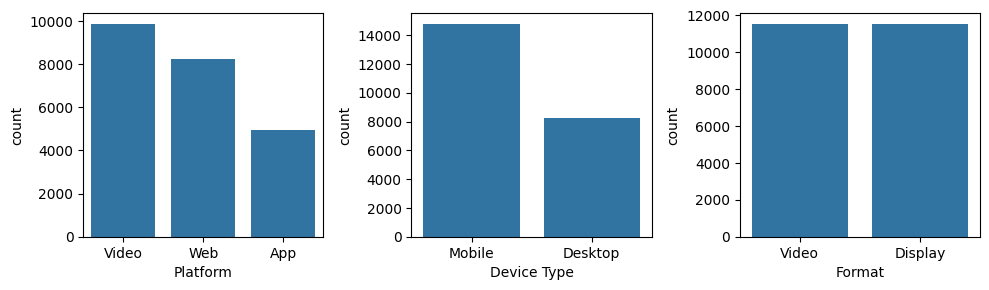

In [ ]:
plt.figure(figsize=[10,3])
plt.subplot(131)
sns.countplot(x=df['Platform'], order=df['Platform'].value_counts().index);
plt.subplot(132)
sns.countplot(x=df['Device Type'], order=df['Device Type'].value_counts().index);
plt.subplot(133)
sns.countplot(x=df['Format'], order=df['Format'].value_counts().index);
plt.tight_layout()

In [9]:
features = df.iloc[:,9:19].columns

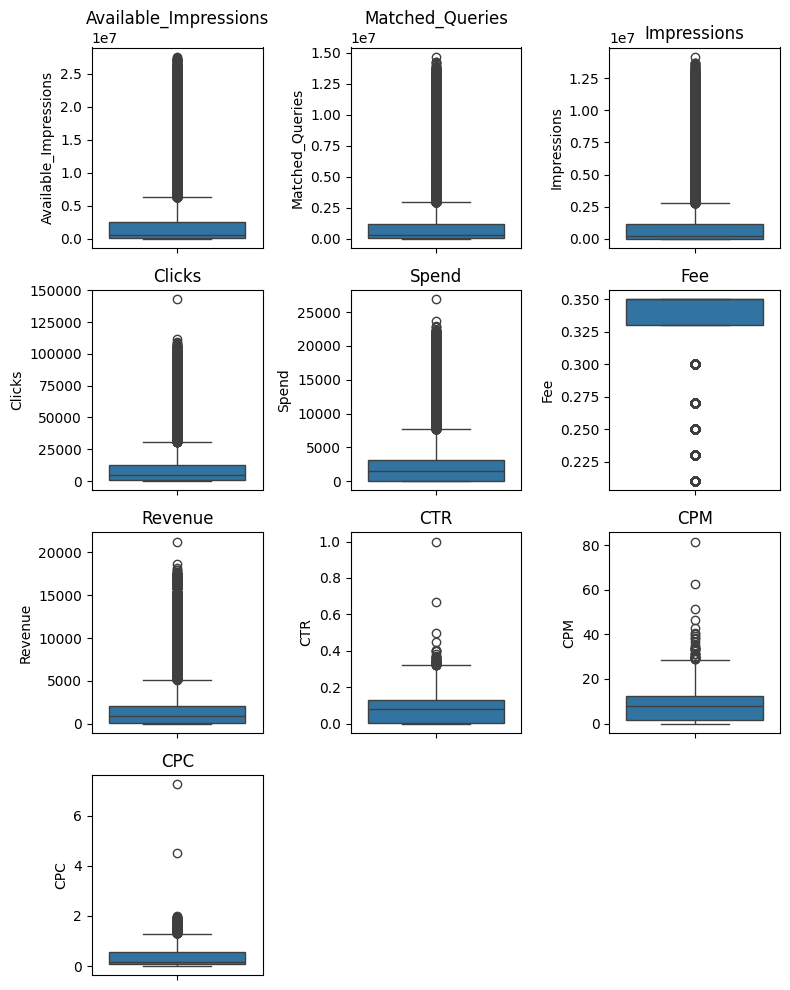

In [93]:
plt.figure(figsize=[8,10])
for i in range(len(features)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = df[features[i]], data = df)
    plt.title(f'{features[i]}')
    plt.tight_layout()

#### Bivariate Analysis

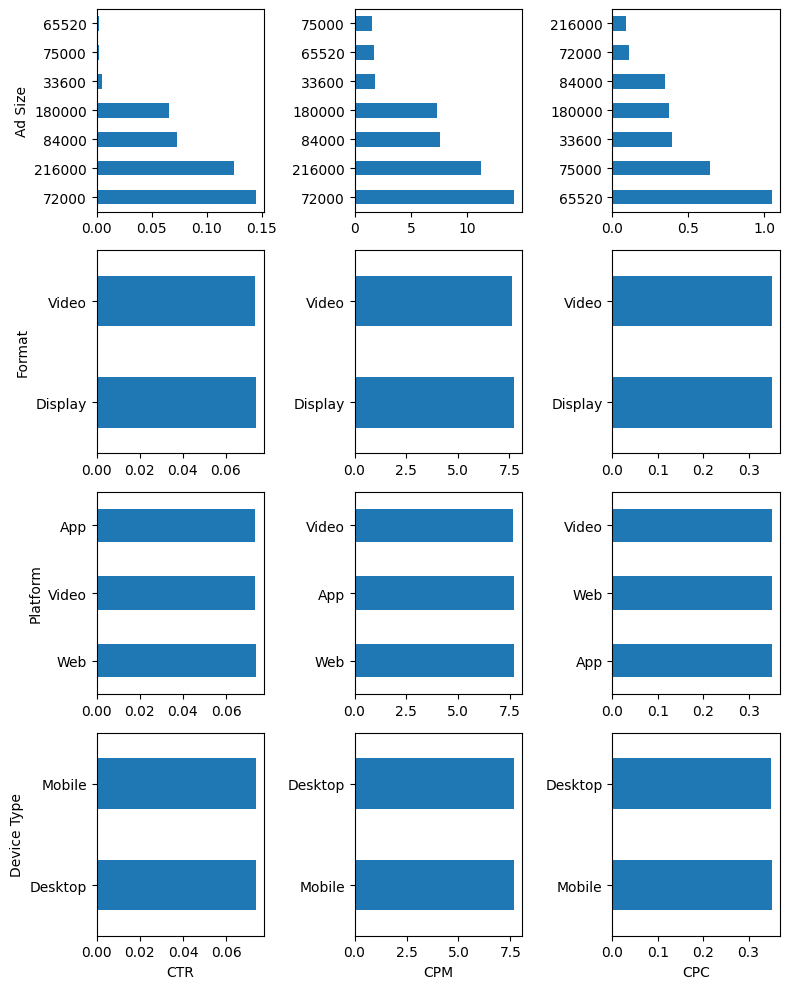

In [8]:
plt.figure(figsize=[8,10])
plt.subplot(431)
df.groupby('Ad Size')['CTR'].mean().sort_values(ascending=False).plot(kind='barh');
plt.subplot(432)
df.groupby('Ad Size')['CPM'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(433)
df.groupby('Ad Size')['CPC'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(434)
df.groupby('Format')['CTR'].mean().sort_values(ascending=False).plot(kind='barh');
plt.subplot(435)
df.groupby('Format')['CPM'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(436)
df.groupby('Format')['CPC'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(437)
df.groupby('Platform')['CTR'].mean().sort_values(ascending=False).plot(kind='barh');
plt.subplot(438)
df.groupby('Platform')['CPM'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(439)
df.groupby('Platform')['CPC'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.subplot(4,3,10)
df.groupby('Device Type')['CTR'].mean().sort_values(ascending=False).plot(kind='barh');
plt.xlabel('CTR');
plt.subplot(4,3,11)
df.groupby('Device Type')['CPM'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.xlabel('CPM');
plt.subplot(4,3,12)
df.groupby('Device Type')['CPC'].mean().sort_values(ascending=False).plot(kind='barh');
plt.ylabel('');
plt.xlabel('CPC');
plt.tight_layout()
plt.show()

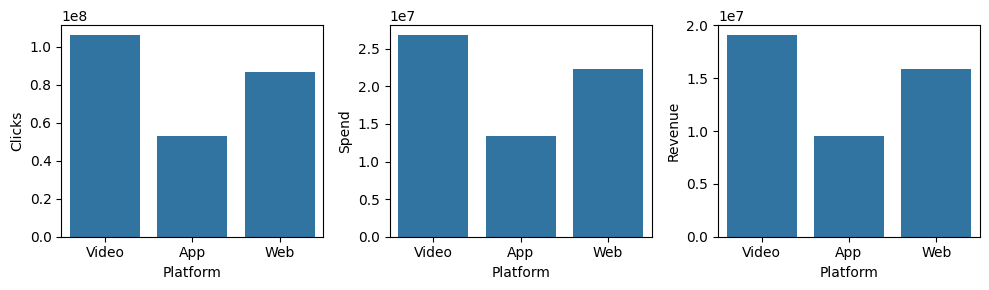

In [9]:
plt.figure(figsize=[10,3])
plt.subplot(1,3,1)
sns.barplot(x=df['Platform'], y=df['Clicks'], estimator='sum', errorbar=None);
plt.subplot(1,3,2)
sns.barplot(x=df['Platform'], y=df['Spend'], estimator='sum', errorbar=None);
plt.subplot(1,3,3)
sns.barplot(x=df['Platform'], y=df['Revenue'], estimator='sum', errorbar=None);
plt.tight_layout()

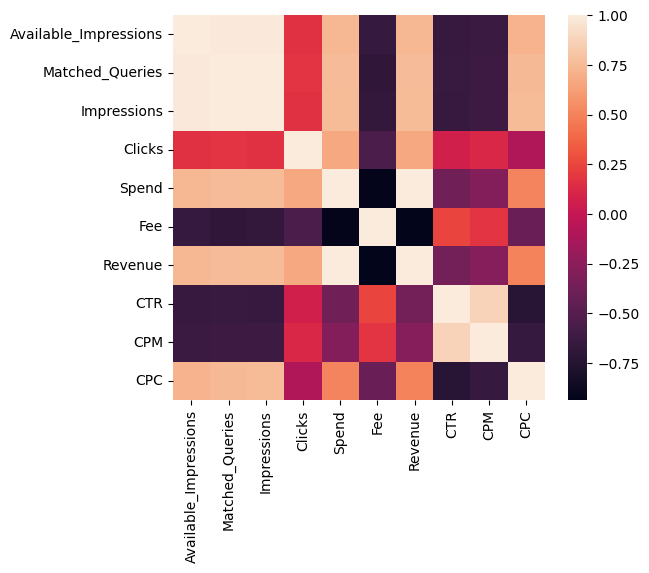

In [91]:
plt.figure(figsize=[6,5])
sns.heatmap(df.iloc[:,9:19].corr());

### Data Preprocessing

In [10]:
df['CTR'] = round(df['Clicks']/df['Impressions'], 2)

In [11]:
df['CPM'] = round((df['Spend']/df['Impressions'])*100, 2)

In [12]:
df['CPC'] = round(df['Spend']/df['Clicks'], 2)

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
Ad_Dim                   0
Imp_pct                  0
dtype: int64

In [95]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [96]:
feature_list = df.iloc[:,9:19].columns

In [97]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

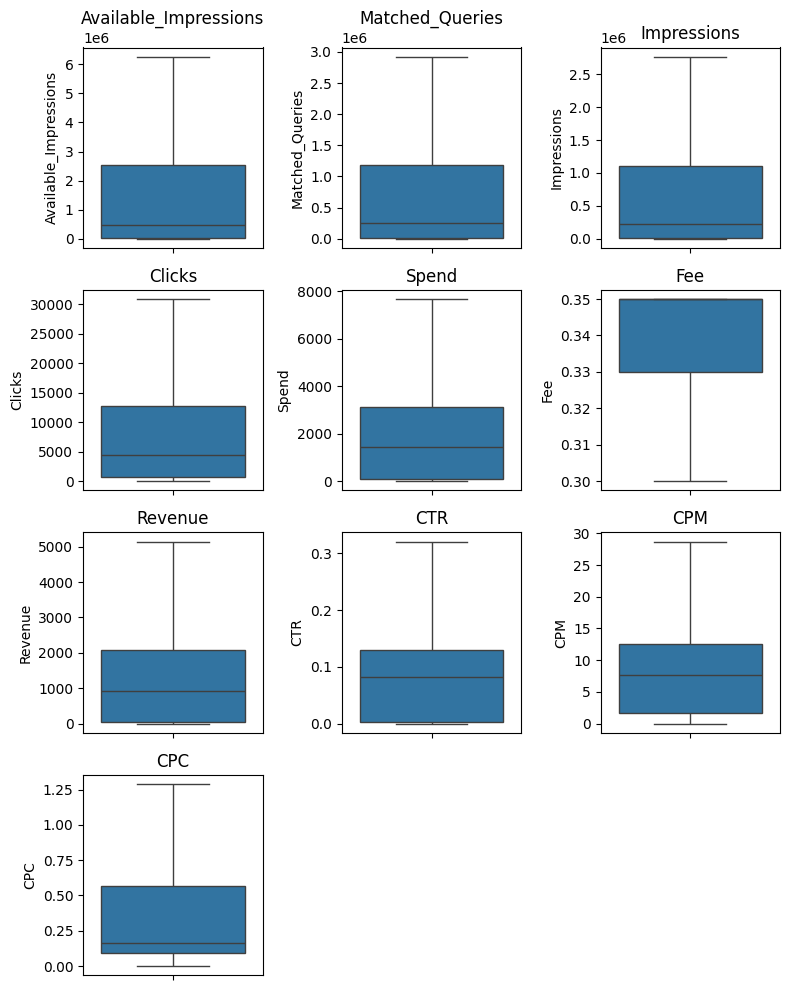

In [98]:
plt.figure(figsize=[8,10])
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [16]:
df_clus = df.iloc[:,9:19]

In [ ]:
df_clus.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0
1,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0
2,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0
3,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0
4,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0


In [17]:
from scipy.stats import zscore
df_clus_scaled = df_clus.apply(zscore)

In [18]:
df_clus_scaled.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.984667,-1.194635,-1.041011
1,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.984667,-1.194635,-1.041011
2,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.984667,-1.194635,-1.041011
3,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.984667,-1.194635,-1.041011
4,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.984667,-1.194635,-1.041011


### Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
plt.figure(figsize=(50, 20))
# plt.title("Country Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(df_clus_scaled, method='ward'),color_threshold=10)
plt.axhline(10, color='black', linestyle='--')
plt.show()


KeyboardInterrupt



<Figure size 5000x2000 with 0 Axes>

### Kmeans Clustering

In [19]:
from sklearn.cluster import KMeans

In [20]:
wss =[]

In [21]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df_clus_scaled)
    wss.append(round(KM.inertia_,2))

In [22]:
wss

[230660.0,
 118404.78,
 80039.22,
 48704.77,
 37505.76,
 30247.94,
 25171.61,
 21883.2,
 20064.93,
 17199.74]

In [23]:
a=[1,2,3,4,5,6,7,8,9,10]

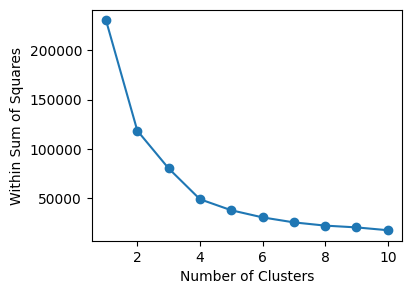

In [139]:
plt.figure(figsize=(4, 3))
plt.plot(range(1,11), wss, marker='o');
plt.xlabel('Number of Clusters');
plt.ylabel('Within Sum of Squares');

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []


In [26]:
 # initialise kmeans
for i in range_n_clusters:
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit_predict(df_clus_scaled)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(df_clus_scaled, cluster_labels, random_state=0))


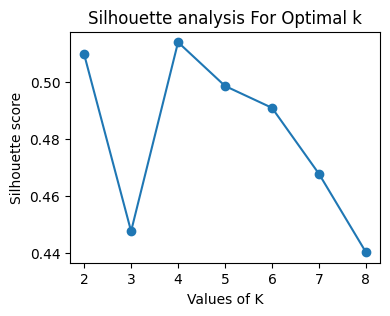

In [140]:
plt.figure(figsize=(4, 3))
plt.plot(range_n_clusters,silhouette_avg, marker = 'o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [28]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit_predict(df_clus_scaled)
labels = k_means.labels_

In [105]:
df["Clus_kmeans4"] = labels
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,2


In [126]:
itsort = sorted(df['InventoryType'].unique())

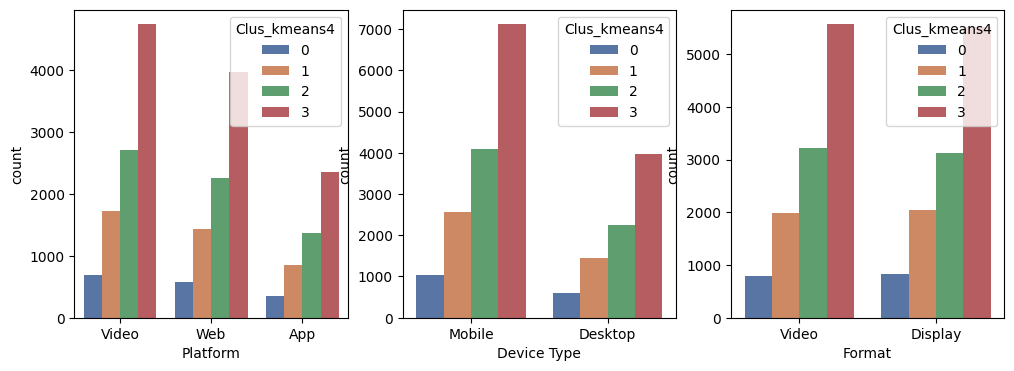

In [136]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.countplot(x=df['Platform'], data=df, hue='Clus_kmeans4', palette='deep', 
              order=df['Platform'].value_counts().index);
plt.subplot(132)
sns.countplot(x=df['Device Type'], data=df, hue='Clus_kmeans4', palette='deep', 
              order=df['Device Type'].value_counts().index);
plt.subplot(133)
sns.countplot(x=df['Format'], data=df, hue='Clus_kmeans4', palette='deep', 
              order=df['Format'].value_counts().index);

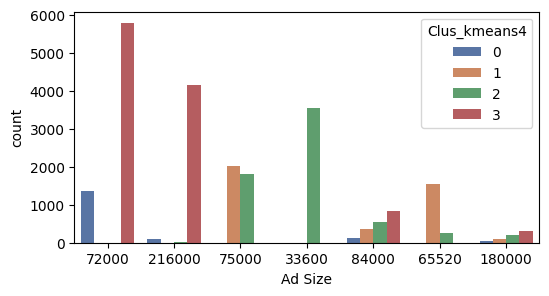

In [134]:
plt.figure(figsize=[6,3])
sns.countplot(x=df['Ad Size'], data=df, hue='Clus_kmeans4', palette='deep', 
              order=df['Ad Size'].value_counts().index);

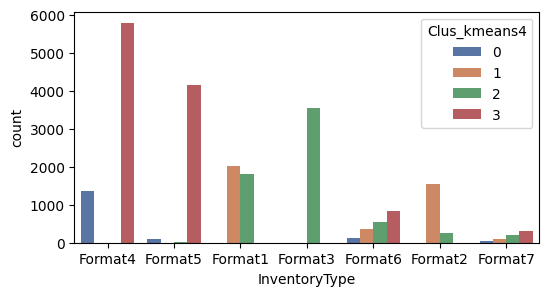

In [135]:
plt.figure(figsize=[6,3])
sns.countplot(x=df['InventoryType'], data=df, hue='Clus_kmeans4', palette='deep', 
              order=df['InventoryType'].value_counts().index);

In [ ]:
sns.barplot(data=df, x='Clus_kmeans4', y='InventoryType')

In [43]:
df['Clus_kmeans4'].count()

23066

In [64]:
df.Clus_kmeans4.value_counts().sort_index()

Clus_kmeans4
0     1630
1     4020
2     6336
3    11080
Name: count, dtype: int64

In [30]:
clust_0 = df[df['Clus_kmeans4'] == 0]

In [31]:
clust_1 = df[df['Clus_kmeans4'] == 1]

In [32]:
clust_2 = df[df['Clus_kmeans4'] == 2]

In [33]:
clust_3 = df[df['Clus_kmeans4'] == 3]

In [ ]:
clust_0.describe().round(2)

In [34]:
df_clus_num = df.iloc[:,9:20]
df_clus_num.head()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0,2
1,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0,2
2,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0,2
3,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0,2
4,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0,0.0,0.0,2


In [39]:
clust_profile = df_clus_num.groupby('Clus_kmeans4').mean().round(2)

In [41]:
clust_profile['freq']=df_clus_num.Clus_kmeans4.value_counts().sort_index()

In [42]:
clust_profile

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Clus_kmeans4,,,,,,,,,,,
0,790535.85,553268.22,466992.19,30638.79,6367.58,0.31,4347.17,0.14,1.52,0.11,1630
1,5712214.21,2813243.41,2677457.92,11300.23,5759.93,0.31,3892.92,0.00,0.16,0.75,4020
2,1814910.99,867540.62,829613.22,3262.56,1505.11,0.35,980.96,0.00,0.18,0.53,6336
3,119308.83,66276.29,54314.68,6819.99,622.01,0.35,404.40,0.15,1.33,0.10,11080


In [57]:
cols_visualise = df_clus_num.iloc[:, :-1].columns
cols_visualise

Index(['Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC'],
      dtype='object')

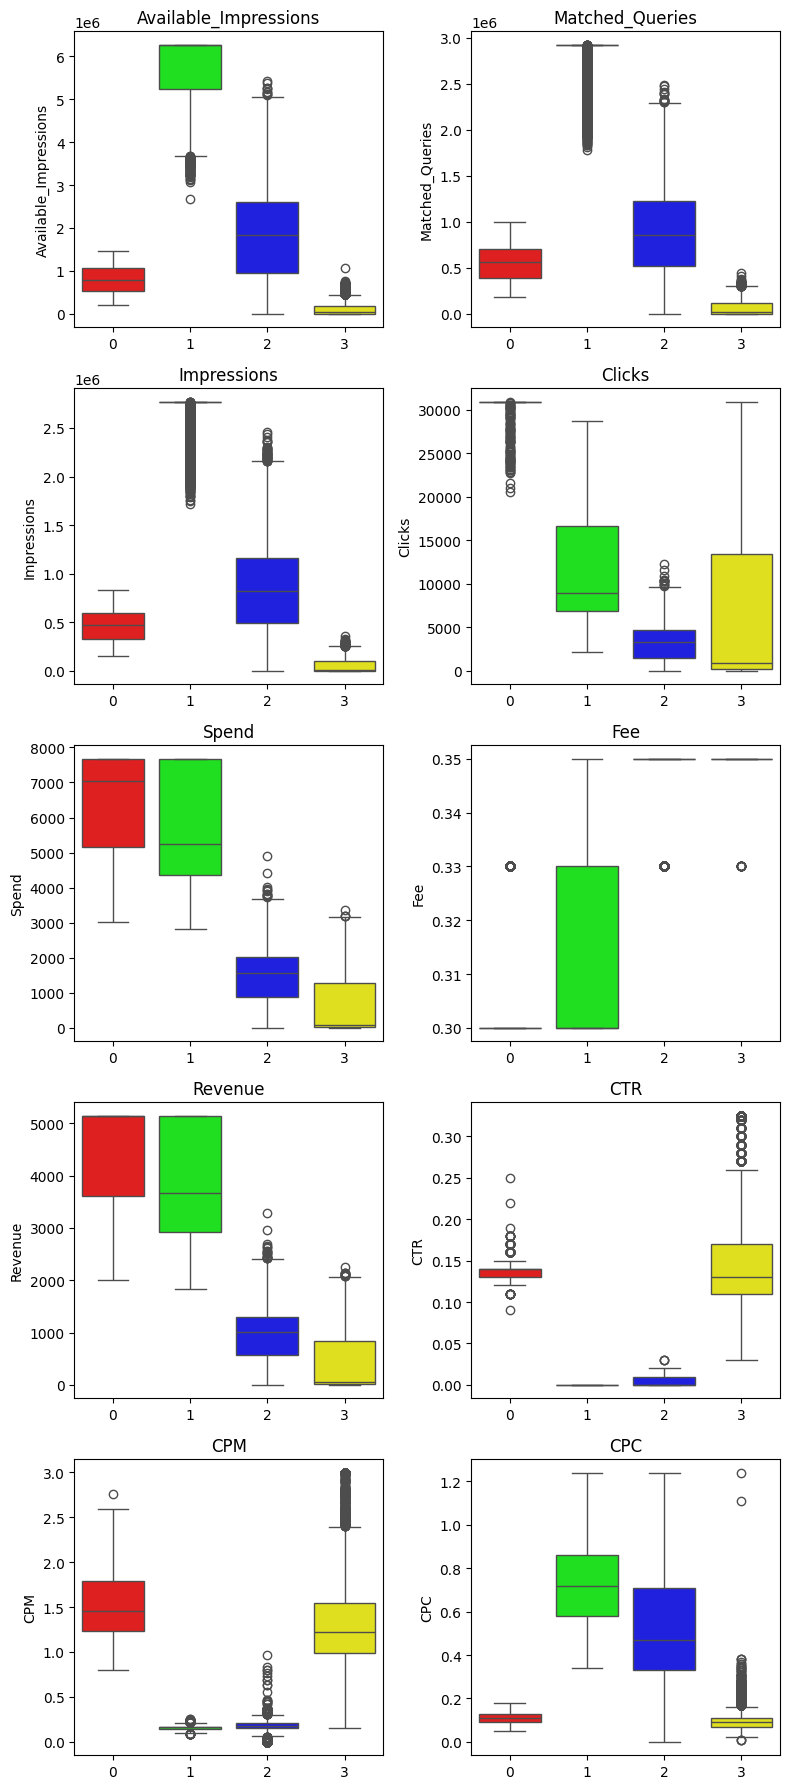

In [88]:
fig, axes = plt.subplots(5, 2, figsize=(8, 18))

# Iterate over columns in cols_visualise
for i, col in enumerate(cols_visualise):
    sns.boxplot(x='Clus_kmeans4', y=col, data=df_clus_num, hue='Clus_kmeans4', palette=custom_palette, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{col}')
    axes[i // 2, i % 2].legend().set_visible(False)  # Hide legend for each subplot
    axes[i // 2, i % 2].set_xlabel('')
plt.tight_layout()
plt.show()

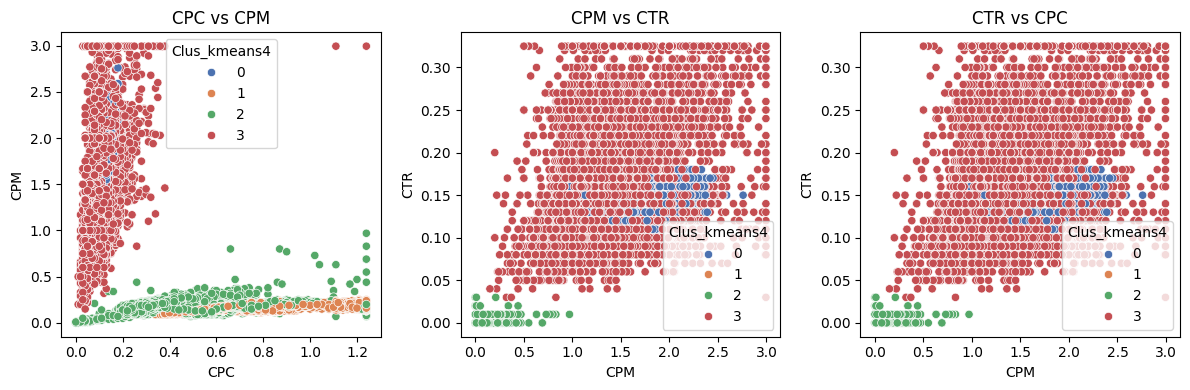

In [86]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.scatterplot(x = 'CPC', y = 'CPM', data = df_clus_num, hue='Clus_kmeans4', palette='deep')
plt.title('CPC vs CPM')
plt.subplot(132)
sns.scatterplot(x = 'CPM', y = 'CTR', data = df_clus_num, hue='Clus_kmeans4', palette='deep')
plt.title('CPM vs CTR')
plt.subplot(133)
sns.scatterplot(x = 'CPM', y = 'CTR', data = df_clus_num, hue='Clus_kmeans4', palette='deep')
plt.title('CTR vs CPC')
plt.tight_layout()
plt.show()